# 2023/10/08
グラフによる実装に切り替えるために色々トライする

グラフによる実装と言っても色々あって，まずはグラフを作ってそれでデータを保存することを目指す．

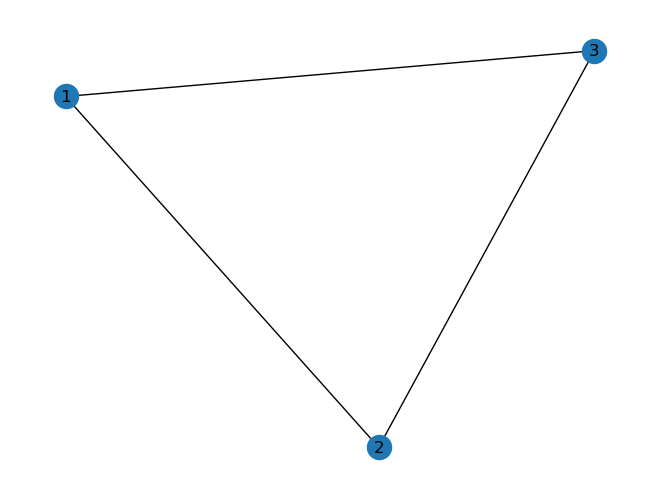

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G_ex1 = nx.Graph()

# nodeを追加（atomicnumber,position,mol_idを追加できる．）
G_ex1.add_node(1,atomicnumber=1,position=np.array([1,2,3]),mol_id=0)
G_ex1.add_node(2,atomicnumber=1,position=np.array([10,20,30]),mol_id=0)
G_ex1.add_node(3,atomicnumber=1,position=np.array([2,2,3]),mol_id=0)
# G_ex1.add_node("hoge")

# nodeの削除
# G_ex1.remove_node(3)

# edgeを追加（dipole, wannierpositionを追加できる．BCの座標はまあええか？関数で計算可能にする）
G_ex1.add_edge(1, 2,dipole=np.array([1,1,1]),wannierposition=np.array([2,2,2]))
G_ex1.add_edge(1, 3)
G_ex1.add_edge(2, 3)

# edgeの削除
# G_ex1.remove_edge(2, "hoge")

# 可視化
nx.draw(G_ex1, with_labels = True)
plt.show()

In [5]:
# 全ノードの取得
G_ex1.nodes

NodeView((1, 2, 3))

In [6]:
# 特定のノードを取得
G_ex1.nodes[1]

{'atomicnumber': 1, 'position': array([1, 2, 3]), 'mol_id': 0}

In [21]:
# 全てのエッジを取得
G_ex1.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [7]:
# 特定のエッジを取得
G_ex1.edges[1,2]

{'dipole': array([1, 1, 1]), 'wannierposition': array([2, 2, 2])}

In [17]:
# 特定のnodeのpropertyを取得
list_positions=nx.get_node_attributes(G_ex1,"position")
print(list_positions)
print(list_positions[1])
print(list_positions[2])

{1: array([1, 2, 3]), 2: array([10, 20, 30]), 3: array([2, 2, 3])}
[1 2 3]
[10 20 30]


In [28]:
#
# 特定のグラフからase.atomsを作る
#
ase_positions=np.array(list(nx.get_node_attributes(G_ex1,"position").values()))
print(list(ase_positions))
ase_atomicnum=list(nx.get_node_attributes(G_ex1,"atomicnumber").values())
import ase

test=ase.Atoms(
    ase_atomicnum,
    positions=ase_positions
)

print(test)


[array([1, 2, 3]), array([10, 20, 30]), array([2, 2, 3])]
Atoms(symbols='H3', pbc=False)
